In [1]:
import johnny_deep

from importlib import reload
reload(johnny_deep.models)
reload(johnny_deep.utils)

<module 'johnny_deep.utils' from '/Users/marco/Desktop/johnny_deep/johnny_deep/utils.py'>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [4]:
X, Y = make_moons(n_samples=1000, noise=0.10, random_state=100)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = X_train.transpose()
X_test = X_test.transpose()
del X, Y

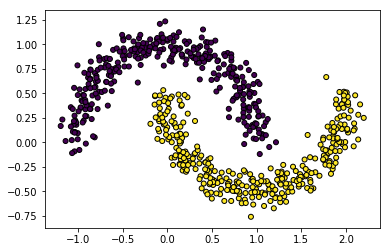

In [6]:
plt.scatter(X_train[0, :], X_train[1, :], marker='o', c=Y_train, s=25, edgecolor='k')

In [7]:
nn_architecture = [
    {"dimension": 2, "type": "input"},
    {"dimension": 20, "type": "relu"},
    {"dimension": 20, "type": "relu"},
    {"dimension": 20, "type": "relu"},
    {"dimension": 1, "type": "sigmoid"},
]

In [8]:
m = johnny_deep.models.Model(nn_architecture)

In [9]:
m.model_info()

Layer 1: relu with dimension 20
W shape: (20, 2)
b shape: (20, 1)
Layer 2: relu with dimension 20
W shape: (20, 20)
b shape: (20, 1)
Layer 3: relu with dimension 20
W shape: (20, 20)
b shape: (20, 1)
Layer 4: sigmoid with dimension 1
W shape: (1, 20)
b shape: (1, 1)


In [10]:
m.fit(X_train, Y_train, 2000, 0.1, mini_batch_size=32)

Epoch 100 - cost 0.0042350102265991275
Epoch 200 - cost 0.0008885029114961116
Epoch 300 - cost 0.0004315162738930392
Epoch 400 - cost 0.0002693596134056541
Epoch 500 - cost 0.0001907663709758704
Epoch 600 - cost 0.00014484406455704052
Epoch 700 - cost 0.00011533113082329462
Epoch 800 - cost 9.500178910695297e-05
Epoch 900 - cost 8.034471571094383e-05
Epoch 1000 - cost 6.933859130960406e-05
Epoch 1100 - cost 6.080067035262511e-05
Epoch 1200 - cost 5.396376652653486e-05
Epoch 1300 - cost 4.840486991002588e-05
Epoch 1400 - cost 4.3810305302023045e-05
Epoch 1500 - cost 3.9952928867926524e-05
Epoch 1600 - cost 3.667517887601293e-05
Epoch 1700 - cost 3.385944244199966e-05
Epoch 1800 - cost 3.141545100160235e-05
Epoch 1900 - cost 2.9276232875261913e-05
Epoch 2000 - cost 2.7390461033034185e-05


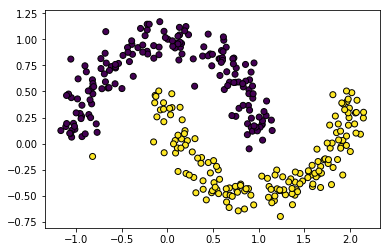

In [11]:
Y_hat = m.forward(X_test)
Y_pred = johnny_deep.utils.convert_prob_into_class(Y_hat)
plt.scatter(X_test[0, :], X_test[1, :], marker='o', c=Y_pred, edgecolor='k')